In [49]:
""" Comparison of tree-based algorithms on the california housing data set."""

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [50]:
# prepare data (california housing)

# load data
housing = fetch_california_housing(as_frame=True)
# Create a dataframe
df_complete = housing['data'].join(housing['target'])

# train/test split
X_train, X_test, y_train, y_test = train_test_split(housing['data'], housing['target'], 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
# useful functions for getting to know the dataset
df_complete.head()
df_complete.describe()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [51]:
# model creation

# baseline: linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_lr = linear_reg.predict(X_test)

# random forest
random_forest = RandomForestRegressor(random_state = 42)

random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)

# XGBoost
xgboost = XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)
predictions_xgb = xgboost.predict(X_test)

In [54]:
# plots & evaluation, interpretation

# Error caculation (MAE)
errors_lr = abs(predictions_lr - y_test)
errors_rf = abs(predictions_rf - y_test)
errors_xgb = abs(predictions_xgb - y_test)


print("Mean Absolute Error of Linear Regression:", round(np.mean(errors_lr), 2))
print("Accuracy Score of Linear Regression:", linear_reg.score(X_test, y_test)*100)
print()
print("Mean Absolute Error of Random Forest:", round(np.mean(errors_rf), 2))
print("Accuracy Score of Random Forest:", random_forest.score(X_test, y_test)*100)
print()
print("Mean Absolute Error of XGBoost:", round(np.mean(errors_xgb), 2))
print("Accuracy Score of XGBoost:", xgboost.score(X_test, y_test)*100)

Mean Absolute Error of Linear Regression: 0.53
Accuracy Score of Linear Regression: 59.10509795491351

Mean Absolute Error of Random Forest: 0.33
Accuracy Score of Random Forest: 80.78595561901133

Mean Absolute Error of XGBoost: 0.31
Accuracy Score of XGBoost: 83.39290423071706


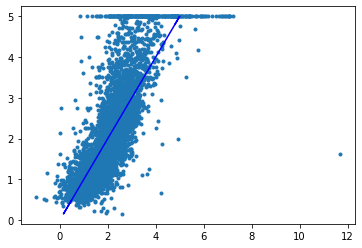

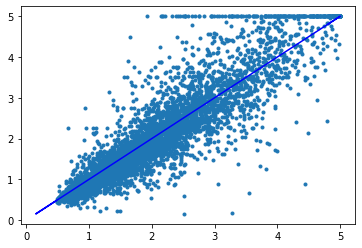

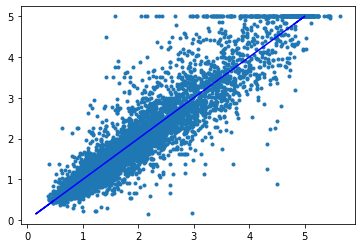

In [48]:
predictions_list = [predictions_lr, predictions_rf, predictions_xgb]
for prediction in predictions_list:
    plt.scatter(prediction, y_test, marker=".")
    plt.plot(y_test, y_test, color="b")
    plt.show()

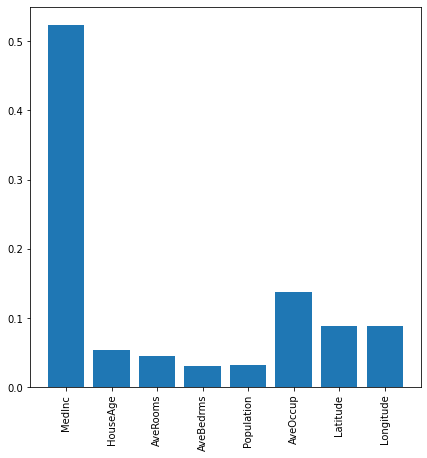

In [43]:
# interpretation
attributes = X_test.columns
importances = random_forest.feature_importances_
sorted(zip(importances, attributes), reverse=True)

plt.figure(figsize=(7,7))
plt.bar(attributes, importances)
plt.xticks(rotation=90)
plt.show()